# Food Delivery Cost and Profitability Analysis
Food Delivery Cost and Profitability Analysis is a comprehensive evaluation aimed at understanding and optimizing the financial dynamics of a food delivery operation. The goal is to identify areas where the service can reduce costs, increase revenue, and implement pricing or commission strategies that enhance profitability. So, if you want to learn how to perform cost and profitability analysis of a business operation, this article is for you. In this article, I’ll take you through the task of Food Delivery Cost and Profitability Analysis using Python.

### Food Delivery Cost and Profitability Analysis: Process We Can Follow

Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

Below is the process we can follow for the task of Food Delivery Cost and Profitability Analysis:

1) Start by gathering comprehensive data related to all aspects of food delivery operations.
2) Clean the dataset for inconsistencies, missing values, or irrelevant information.
3) Extract relevant features that could impact cost and profitability.
4) Break down the costs associated with each order, including fixed costs (like packaging) and variable costs (like delivery fees and discounts).
5) Determine the revenue generated from each order, focusing on commission fees and the order value before discounts.
6) For each order, calculate the profit by subtracting the total costs from the revenue. Analyze the distribution of profitability across all orders to identify trends.
7) Based on the cost and profitability analysis, develop strategic recommendations aimed at enhancing profitability.
8) Use the data to simulate the financial impact of proposed changes, such as adjusting discount or commission rates.

In [1]:
import pandas as pd

food = pd.read_csv("food_orders_new_delhi.csv")

In [2]:
food.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


In [3]:
food.shape

(1000, 12)

In [4]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [5]:
food.describe(include='all')

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
count,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000,815,1000.00000,1000.000000,1000.000000
unique,NaN,947,621,1000,1000,NaN,NaN,3,4,NaN,NaN,NaN
top,NaN,C7938,R2317,2024-02-01 01:11:52,2024-02-01 02:39:52,NaN,NaN,Cash on Delivery,10%,NaN,NaN,NaN
freq,NaN,3,6,1,1,NaN,NaN,357,233,NaN,NaN,NaN
mean,500.500000,NaN,NaN,NaN,NaN,1053.969000,28.620000,NaN,NaN,126.99000,29.832000,28.300000
std,288.819436,NaN,NaN,NaN,NaN,530.975339,16.958278,NaN,NaN,43.06405,11.627165,49.614228
min,1.000000,NaN,NaN,NaN,NaN,104.000000,0.000000,NaN,NaN,50.00000,10.000000,0.000000
25%,250.750000,NaN,NaN,NaN,NaN,597.750000,20.000000,NaN,NaN,90.00000,20.000000,0.000000
50%,500.500000,NaN,NaN,NaN,NaN,1038.500000,30.000000,NaN,NaN,127.00000,30.000000,0.000000
75%,750.250000,NaN,NaN,NaN,NaN,1494.000000,40.000000,NaN,NaN,164.00000,40.000000,50.000000


# Data Cleaning

In [6]:
food_cleaned = food.copy()

In [7]:
food_cleaned.isnull().sum()

Order ID                    0
Customer ID                 0
Restaurant ID               0
Order Date and Time         0
Delivery Date and Time      0
Order Value                 0
Delivery Fee                0
Payment Method              0
Discounts and Offers      185
Commission Fee              0
Payment Processing Fee      0
Refunds/Chargebacks         0
dtype: int64

In [8]:
food_cleaned.fillna(value="None", inplace=True) 
# Replace NaN with None which means that the order didn't have any discount associated with it

In [9]:
food_cleaned.isnull().sum()

Order ID                  0
Customer ID               0
Restaurant ID             0
Order Date and Time       0
Delivery Date and Time    0
Order Value               0
Delivery Fee              0
Payment Method            0
Discounts and Offers      0
Commission Fee            0
Payment Processing Fee    0
Refunds/Chargebacks       0
dtype: int64

In [10]:
food_cleaned.head(5)

,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks
0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0
1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0
2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0
3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,None,146,27,0
4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0


- Convert “Order Date and Time” and “Delivery Date and Time” to a datetime format.
- Convert “Discounts and Offers” to a consistent numeric value (if applicable) or calculate the discount amounts.
- Ensure all monetary values are in a suitable format for calculations.

In [11]:
from datetime import datetime

# Convert "Order Date and Time" and "Delivery Date and Time" to datetime object
food_cleaned["Order Date and Time"] = pd.to_datetime(food_cleaned["Order Date and Time"])
food_cleaned["Delivery Date and Time"] = pd.to_datetime(food_cleaned["Delivery Date and Time"])

# 0) Create extract function to transform string into int
def extract(discount):
    # Percentage in discount
    if "%" in discount: 
        return float(discount.split("%")[0])
    # "off" in discount
    elif "off" in discount: 
        return float(discount.split(" ")[0])
    # no discount
    else: 
        return 0

# 1) Applying lambda function to create Discount Percentage feature
food_cleaned["Discount Percentage"] = food_cleaned["Discounts and Offers"].apply(lambda x: extract(x))

# 2) Calculate Discount Amount
food_cleaned["Discount Amount"] = food_cleaned["Order Value"] * food_cleaned["Discount Percentage"]/100

In [12]:
print(food_cleaned[["Order Value", "Discount Percentage", "Discount Amount"]], food_cleaned.dtypes)

     Order Value  Discount Percentage  Discount Amount
0           1914                  5.0            95.70
1            986                 10.0            98.60
2            937                 15.0           140.55
3           1463                  0.0             0.00
4           1992                 50.0           996.00
..           ...                  ...              ...
995          825                  5.0            41.25
996         1627                  0.0             0.00
997          553                  0.0             0.00
998         1414                 15.0           212.10
999         1657                 15.0           248.55

[1000 rows x 3 columns] Order ID                           int64
Customer ID                       object
Restaurant ID                     object
Order Date and Time       datetime64[ns]
Delivery Date and Time    datetime64[ns]
Order Value                        int64
Delivery Fee                       int64
Payment Method              

For the cost analysis, we’ll consider the following costs associated with each order:

- Delivery Fee: The fee charged for delivering the order.
- Payment Processing Fee: The fee for processing the payment.
- Discount Amount: The discount provided on the order.

We’ll calculate the total cost for the platform per order and then aggregate this data to understand the overall cost structure.

The revenue for the platform is mainly derived from the Commission Fee. We’ll calculate the net profit by subtracting the total costs (including discounts) from the revenue generated through commission fees.

Let’s proceed with the cost and profitability analysis:

In [13]:
# Costs
food_cleaned["Total Cost"] = food_cleaned["Delivery Fee"] + food_cleaned["Payment Processing Fee"] + food_cleaned["Discount Amount"]

# Revenue is from Commission Fee (the fee that is charged on the restaurant)
food_cleaned["Revenue"] = food_cleaned["Commission Fee"]

# Profit = Revenue - Costs
food_cleaned["Profit"] = food_cleaned.Revenue - food_cleaned["Total Cost"]

In [14]:
food_cleaned[["Total Cost", "Revenue", "Profit"]]

,Total Cost,Revenue,Profit
0,142.70,150,7.30
1,161.60,198,36.40
2,215.55,195,-20.55
3,77.00,146,69.00
4,1076.00,130,-946.00
...,...,...,...
995,88.25,165,76.75
996,92.00,110,18.00
997,51.00,64,13.00
998,246.10,199,-47.10


In [15]:
# Aggregate data to get overall metrics
total_orders = food_cleaned.shape[0]
total_revenue = food_cleaned.Revenue.sum()
total_cost = food_cleaned["Total Cost"].sum()
total_profit = food_cleaned.Profit.sum()

In [16]:
overall_metric_dict = {
    "Total Orders": total_orders,
    "Total Revenue": total_revenue,
    "Total Cost": total_cost,
    "Overall Profit": total_profit,
}

In [17]:
overall_metric_dict # Loss - ขาดทุน

{'Total Orders': 1000,
 'Total Revenue': 126990,
 'Total Cost': 232709.85,
 'Overall Profit': -105719.85}

### ขาดทุน
The analysis indicates that the total costs associated with the food delivery operations exceed the total revenue generated from commission fees, resulting in a net loss. It suggests that the current commission rates, delivery fees, and discount strategies might not be sustainable for profitability.

First Phase of Model logic (assumption)
- ยอมขาดทุนในช่วงแรกเพื่อดึงดูดผู้ใช้งาน ?
- เพื่อเป็นที่นิยมในแวดวงนักสั่งอาหาร (ให้ discount เยอะ, ค่าบริการถูกกว่าเจ้าอื่น) ?
- เมื่อมีฐานลูกค้ามากพอ (new + old & loyal customers) ค่อยพลิกกลับมากินกำไร ? ได้หรือป่าว ?

To better understand the distribution of costs, revenue, and profit, let’s plot:

1. A histogram of profits per order to visualize the distribution of profitable and unprofitable orders.
2. A pie chart to visualize the proportion of total costs (delivery fees, payment processing fees, and discounts).
3. A bar chart to compare total revenue, total costs, and total profit

Histogram of profits per order

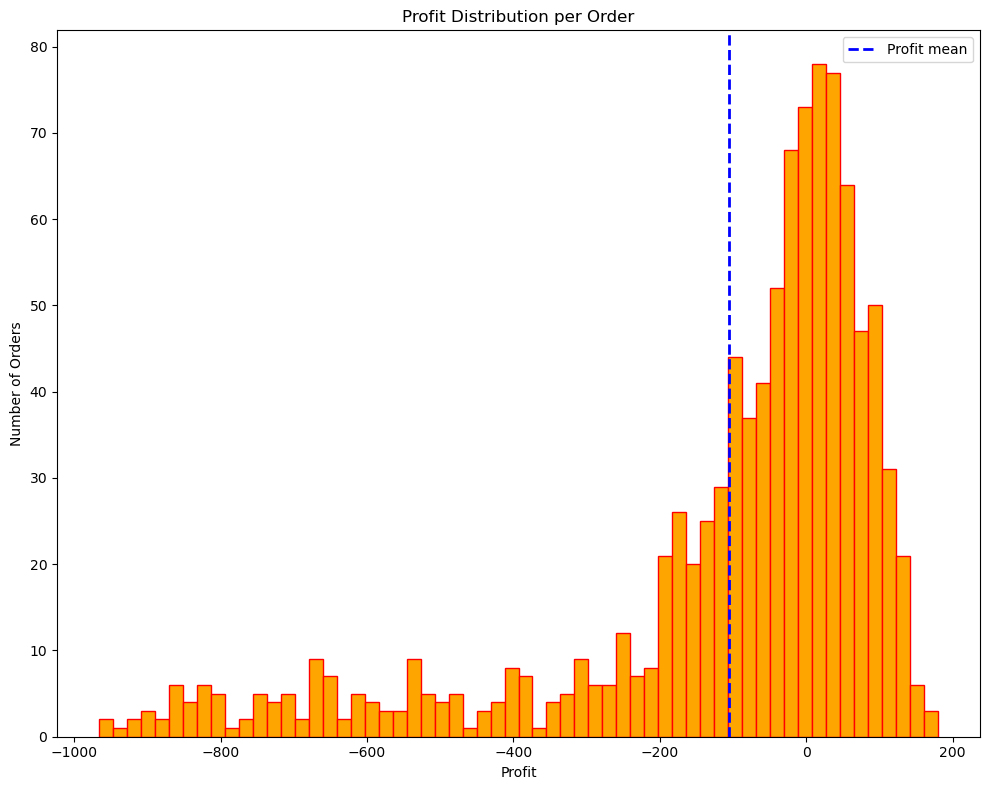

In [18]:
import matplotlib.pyplot as plt

# histogram of profits per order
plt.figure(figsize=(10,8))
plt.hist(food_cleaned.Profit, bins=60, color="orange", edgecolor="red")
plt.title("Profit Distribution per Order")
plt.xlabel("Profit")
plt.ylabel("Number of Orders")
plt.axvline(food_cleaned.Profit.mean(), label = "Profit mean", color="blue", linestyle="--", linewidth=2)
plt.legend()
plt.tight_layout()
plt.show()

The histogram shows a wide distribution of profit per order, with a noticeable number of orders resulting in a loss (profits below 0). The dark blue dashed line indicates the average profit, which is in the negative territory, highlighting the overall loss-making situation.

Now, let’s have a look at the proportion of total costs:

In [19]:
cost_breakdown = food_cleaned[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
cost_breakdown

Delivery Fee               28620.00
Payment Processing Fee     29832.00
Discount Amount           174257.85
dtype: float64

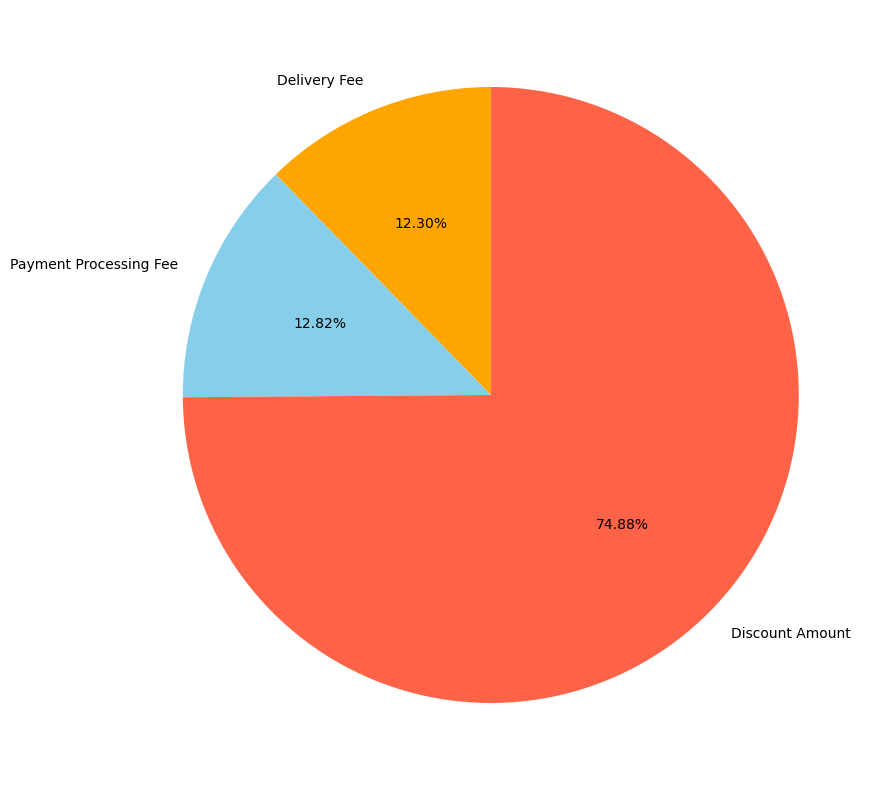

In [20]:
# pie chart for the proportion of total costs
cost_breakdown = food_cleaned[['Delivery Fee', 'Payment Processing Fee', 'Discount Amount']].sum()
plt.figure(figsize=(10,8))
plt.pie(cost_breakdown, labels=cost_breakdown.index, 
            autopct='%1.2f%%', startangle=90, 
            colors=['orange', 'skyblue', 'tomato'])
plt.tight_layout()
plt.show()

first phase of the delivery model: แจกโค้ดลดค่าอาหาร เพื่อดึงดูด new customers and keep old customers loyal; ขยายฐานลูกค้า

The pie chart illustrates the breakdown of total costs into delivery fees, payment processing fees, and discount amounts. Discounts constitute a significant portion of the costs, suggesting that <b>promotional strategies</b> might be heavily impacting overall profitability.

Now, let’s compare total revenue, total costs, and total profit (net loss in our case):

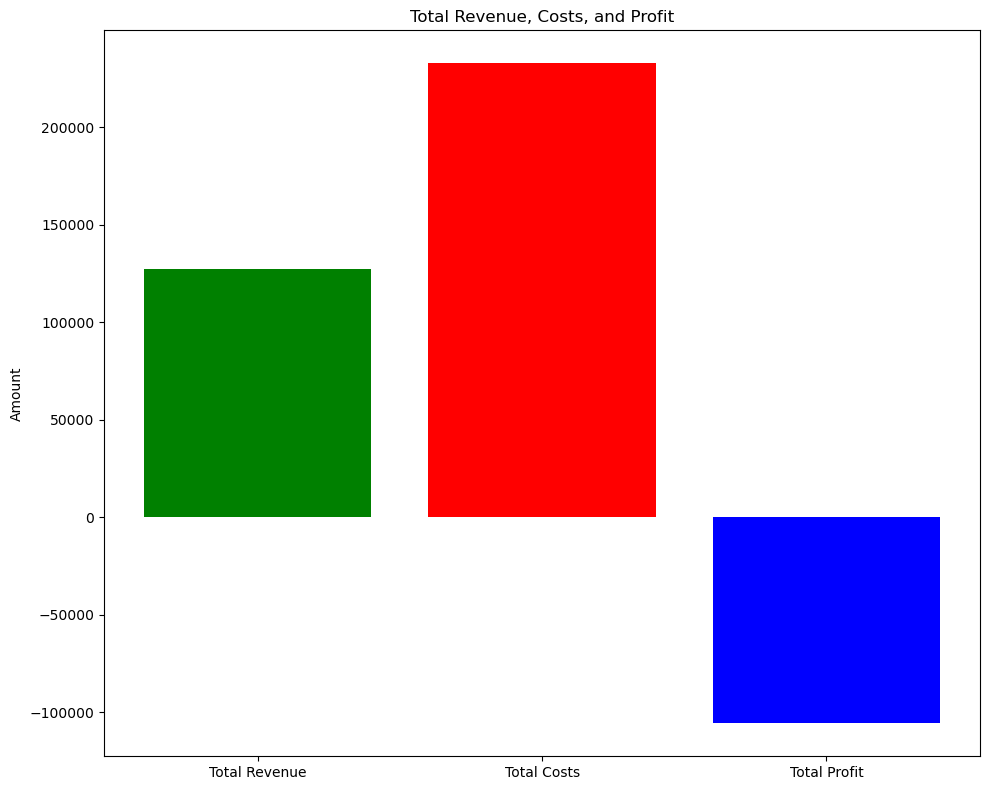

In [21]:
# bar chart for total revenue, costs, and profit
totals = ['Total Revenue', 'Total Costs', 'Total Profit']
values = [total_revenue, total_cost, total_profit]

plt.figure(figsize=(10,8))
plt.bar(x=totals, height=values, color=['green', 'red', 'blue'])
plt.title('Total Revenue, Costs, and Profit')
plt.ylabel('Amount')
plt.tight_layout()
plt.show()

The bar chart compares total revenue, total costs, and total profit. It visually represents the gap between revenue and costs, clearly showing that the costs surpass the revenue, leading to a total loss.

## A New Strategy for Profits

From the analysis so far we understood that the discounts on food orders are resulting in huge losses. Now, we need to find a new strategy for profitability. We need to find a sweet spot for offering discounts and charging commissions. To find a sweet spot for commission and discount percentages, we can analyze the characteristics of profitable orders more deeply. Specifically, we need to look for:

1. A new average commission percentage based on profitable orders.
2. A new average discount percentage for profitable orders, that could serve as a guideline for what level of discount still allows for profitability.

Given these new averages, we can suggest adjustments that might not only make individual orders profitable but also apply broadly across all orders to improve overall profitability. Let’s calculate:

- The average commission percentage for profitable orders.
- The average discount percentage for profitable orders.


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
# filter for profitable order
profit_orders = food_cleaned[food_cleaned.Profit > 0]

# calculate the average commission percentage for profitable orders
profit_orders["Commission Percentage"] = (profit_orders["Commission Fee"] / profit_orders["Order Value"]) * 100

# calculate the average discount percentage for profitable orders (use Discount Amount because the old cost used discount amount as one of its variable, not the discount percentage)
profit_orders["Effective Discount Percentage"] = (profit_orders["Discount Amount"] / profit_orders["Order Value"]) * 100

# calculate the new average
avg_commission_percentage = profit_orders["Commission Percentage"].mean()
avg_eff_discount_percentage = profit_orders["Effective Discount Percentage"].mean()

print(f"Average Commission Percentage is: {avg_commission_percentage:.2f}%\n")
print(f"Average Effective Discount Percentage is: {avg_eff_discount_percentage:.2f}%") 

Average Commission Percentage is: 30.51%

Average Effective Discount Percentage is: 5.87%


In [24]:
# old average commission percentage and discount percentage
old_com = (food_cleaned['Commission Fee'] / food_cleaned['Order Value']) * 100
old_discount = (food_cleaned['Discount Amount'] / food_cleaned['Order Value']) * 100

avg_old_com = old_com.mean()
avg_old_discount = old_discount.mean()

print(f"Average Old Commission Percentage is: {avg_old_com:.2f}%\n")
print(f"Average Old Discount Percentage is: {avg_old_discount:.2f}%") 

Average Old Commission Percentage is: 19.75%

Average Old Discount Percentage is: 16.27%


Based on the analysis of profitable orders, we find a new set of averages that could represent a “sweet spot” for commission and discount percentages:

1. New Average Commission Percentage: 30.51%
2. New Average Discount Percentage: 5.8%

The average commission percentage for profitable orders is significantly higher than the overall average across all orders. It suggests that a higher commission rate on orders might be a key factor in achieving profitability. The average discount percentage for profitable orders is notably lower than the overall average, indicating that lower discounts might contribute to profitability without significantly deterring order volume.

Based on this analysis, a strategy that aims for a commission rate closer to 30% and a discount rate around 5% could potentially improve profitability across the board.

Now, let’s visualize a comparison of profitability using actual versus recommended discounts and commissions across all orders. For this, we need to:

1. Calculate the profitability per order using the actual discounts and commissions already present in the dataset.
2. Simulate profitability per order using the recommended discounts (5%) and commissions (30%) to see the potential impact on profitability.

This comparison will help illustrate the potential impact of adopting the recommended discount and commission rates on the overall profitability of orders. Here’s how to visualize this comparison:

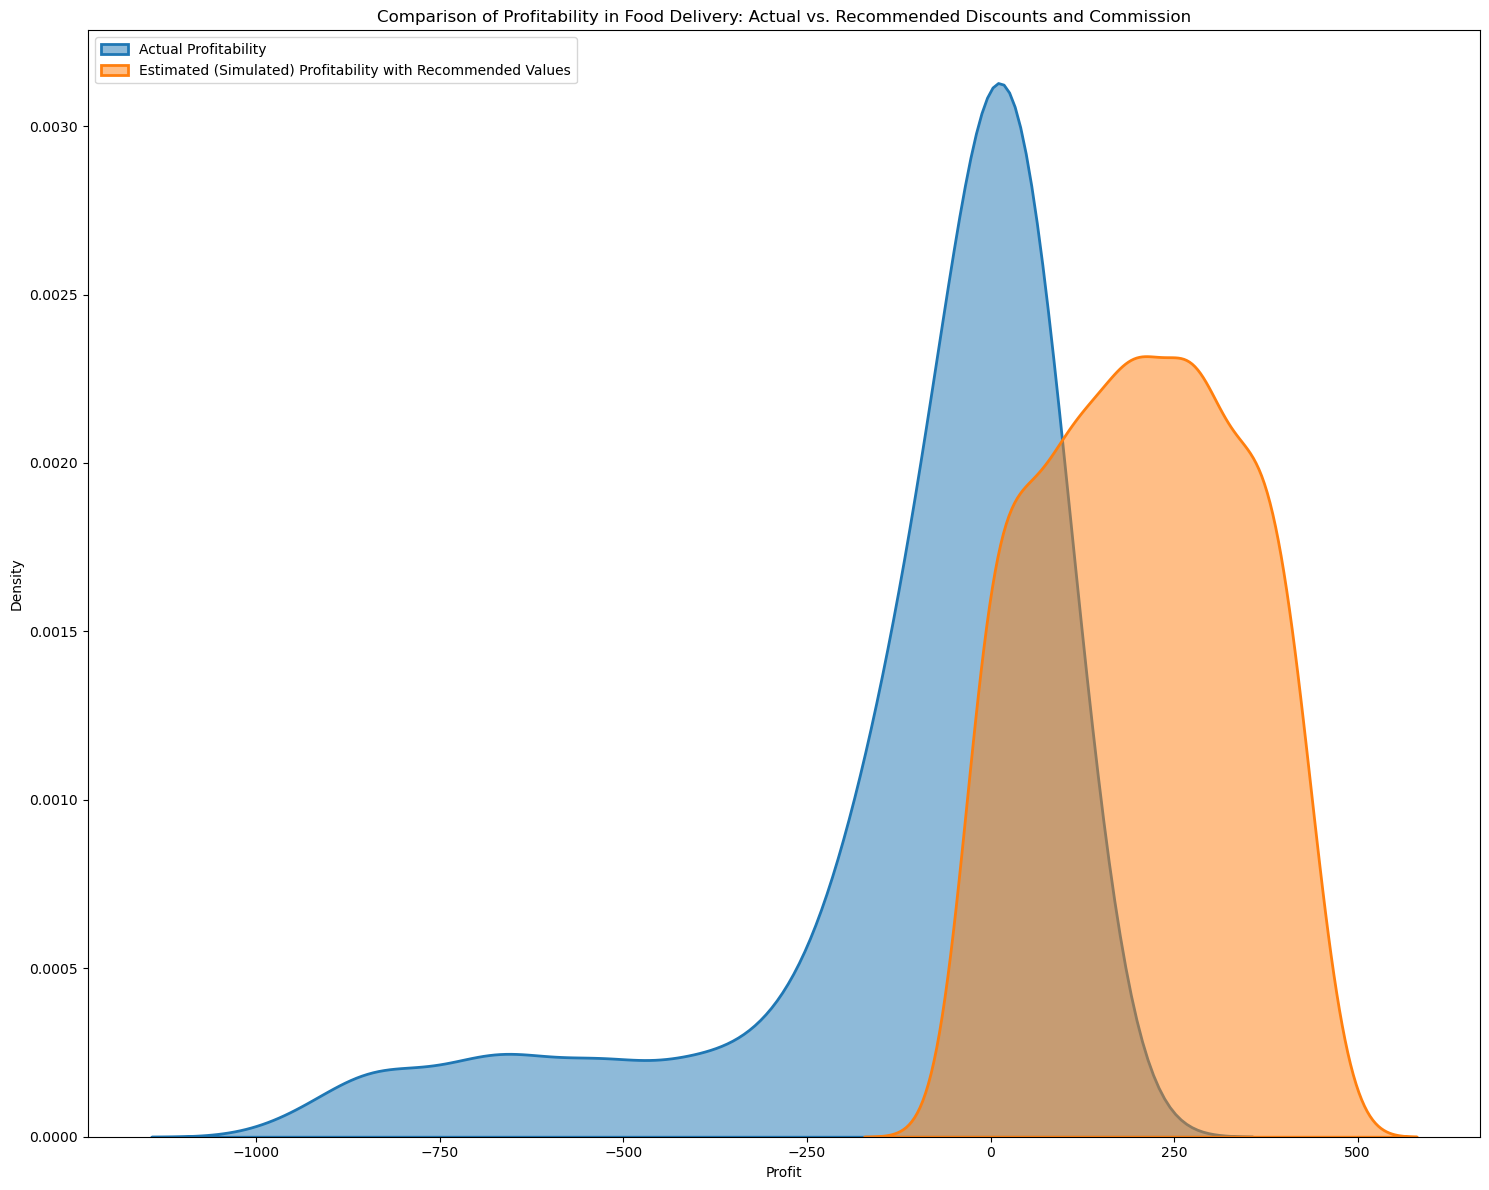

In [25]:
# simulate the profitability with recommended discounts and commission fee
rec_com_per = 30.0 # 30%
rec_dis_per = 5 # 5%

# calculate the simulated commission fee and discount amount using recommended percentages
food_cleaned["Recommended Commission Fee"] = food_cleaned["Order Value"] * (rec_com_per / 100)
food_cleaned["Recommended Discount Percentage"] = food_cleaned["Order Value"] * (rec_dis_per / 100)

# recalculate the total costs with simulated values
food_cleaned['Simulated Total Costs'] = food_cleaned['Delivery Fee'] + food_cleaned['Payment Processing Fee'] + food_cleaned['Recommended Discount Percentage']

# recalculate the total profit with simulated values (Revenue - Costs) and Revenue is the commission fee
food_cleaned['Simulated Profit'] = food_cleaned['Recommended Commission Fee'] - food_cleaned['Simulated Total Costs']

# visualizing the comparison
import seaborn as sns

plt.figure(figsize=(15,12))

# Actual Profitability
sns.kdeplot(food_cleaned['Profit'], label='Actual Profitability', fill=True, alpha=0.5, linewidth=2)

# Simulated Profitability
sns.kdeplot(food_cleaned['Simulated Profit'], label='Estimated (Simulated) Profitability with Recommended Values', fill=True, alpha=0.5, linewidth=2)

plt.title("Comparison of Profitability in Food Delivery: Actual vs. Recommended Discounts and Commission")
plt.xlabel("Profit")
plt.ylabel("Density")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

The visualization compares the distribution of profitability per order using actual discounts and commissions versus the simulated scenario with recommended discounts (5%) and commissions (30%).

The actual profitability distribution shows a mix, with a significant portion of orders resulting in losses (profit < 0) and a broad spread of profit levels for orders. The simulated scenario suggests a shift towards higher profitability per order. The distribution is more skewed towards positive profit, indicating that the recommended adjustments could lead to a higher proportion of profitable orders.


# Summary

So, this is how you can analyze the cost and profitability of a food delivery company. Food Delivery Cost and Profitability Analysis involves examining all the costs associated with delivering food orders, from direct expenses like delivery fees and packaging to indirect expenses like discounts offered to customers and commission fees paid by restaurants. By juxtaposing these costs against the revenue generated (primarily through order values and commission fees), the analysis aims to provide insights into how profitable the food delivery service is on a per-order basis.

In [ ]:
# The End